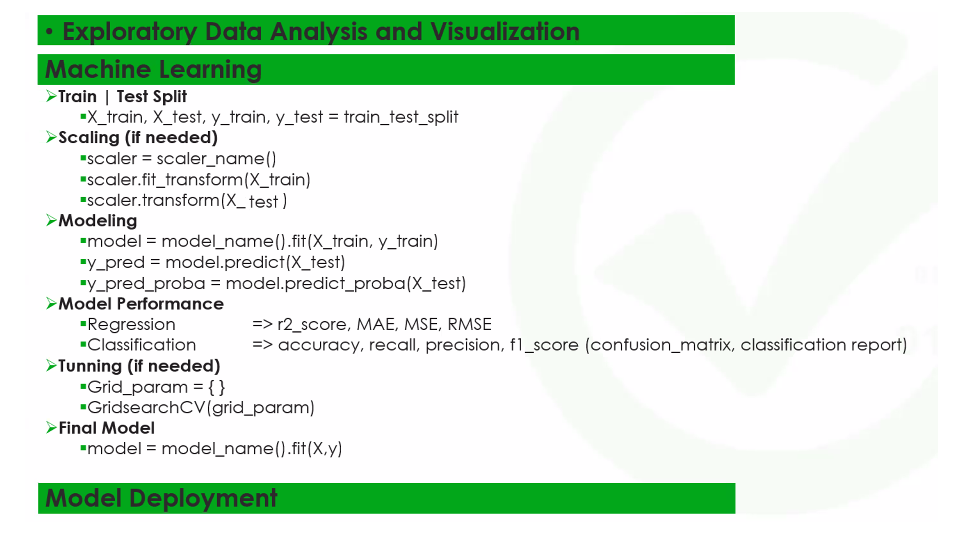

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.options.display.float_format = '{:.3f}'.format

This dataset contains data obtained from diabetes studies conducted on Pima Indian women living in Arizona.

The dataset includes the following features:

1. **Pregnancies:** Number of pregnancies.<br>
2. **Glucose:** Plasma glucose concentration after a 2-hour oral glucose tolerance test.<br>
3. **Blood Pressure:** Blood pressure (mm Hg).<br>
4. **Skin Thickness:** Triceps skinfold thickness (mm).<br>
5. **Insulin:** 2-hour serum insulin (mu U/ml).<br>
6. **BMI:** Body Mass Index (weight in kg/(height in m)^2).<br>
7. **Diabetes Pedigree Function:** A function determining the likelihood of diabetes based on family history.<br>
8. **Age:** Age (years).<br>
9. **Outcome:** Class label (0 or 1), indicating whether the person has diabetes. 1 means the person has diabetes, 0 means they do not.<br>

This dataset is widely used for training machine learning algorithms and in binary classification problems such as predicting diabetes. It is especially used in areas such as data preprocessing, feature engineering, and comparing the performance of classification algorithms.

Typical applications of the dataset include understanding which patient profiles are at risk for diabetes, identifying which features increase the likelihood of diabetes, and developing predictive models to aid in the automatic diagnosis of diabetes.

It is important to note that due to the nature of the dataset, there may be challenges such as missing features or an imbalanced class distribution. These challenges offer an opportunity to delve into machine learning topics such as data cleaning, missing data imputation, handling imbalanced datasets, and model validation techniques.

**Interpretation of Features in the Dataset:**
- **Pregnancies:** Gestational diabetes (diabetes during pregnancy) is a risk factor for type 2 diabetes later in life. Therefore, the number of pregnancies can be a significant predictor.
- **Glucose:** Higher glucose levels indicate impaired insulin regulation, which is a hallmark of diabetes. This feature is crucial for diagnosing and predicting diabetes.
- **Blood Pressure:** High blood pressure is often associated with diabetes and can be a sign of metabolic syndrome, which increases the risk of cardiovascular disease and diabetes.
- **Skin Thickness:** This measurement is often used as an indirect measure of body fat. Higher body fat is associated with an increased risk of diabetes.
- **Insulin Levels:** Insulin levels indicate how the body is managing glucose. Abnormally high or low insulin levels can be indicative of diabetes or pre-diabetes.
- **BMI:** Body Mass Index is a measure of body fat based on height and weight. A higher BMI is strongly associated with an increased risk of type 2 diabetes.
- **Diabetes Pedigree Function:** This feature quantifies the genetic likelihood of developing diabetes, taking into account family history.
- **Age:** Age is a significant risk factor, with the risk of type 2 diabetes increasing as people get older.

**Type 2 Diabetes:** This is a chronic condition that affects how the body processes blood sugar (glucose). In type 2 diabetes, the body either resists the effects of insulin or doesn't produce enough insulin to maintain normal glucose levels.

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.shape

(768, 9)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [7]:
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
745           12      100             84             33      105  30.0   
145            0      102             75             23        0   0.0   
445            0      180             78             63       14  59.4   
439            6      107             88              0        0  36.8   
652            5      123             74             40       77  34.1   
363            4      146             78              0        0  38.5   
277            0      104             64             23      116  27.8   
42             7      106             92             18        0  22.7   
689            1      144             82             46      180  46.1   
421            2       94             68             18       76  26.0   

     DiabetesPedigreeFunction  Age  Outcome  
745                     0.488   46        0  
145                     0.572   21        0  
445                     2.420   25        1  
439                     0.727   31        0  
652                     0.269   28        0  
363                     0.520   67        1  
277                     0.454   23        0  
42                      0.235   48        0  
689                     0.335   46        1  
421                     0.561   21        0

In [8]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

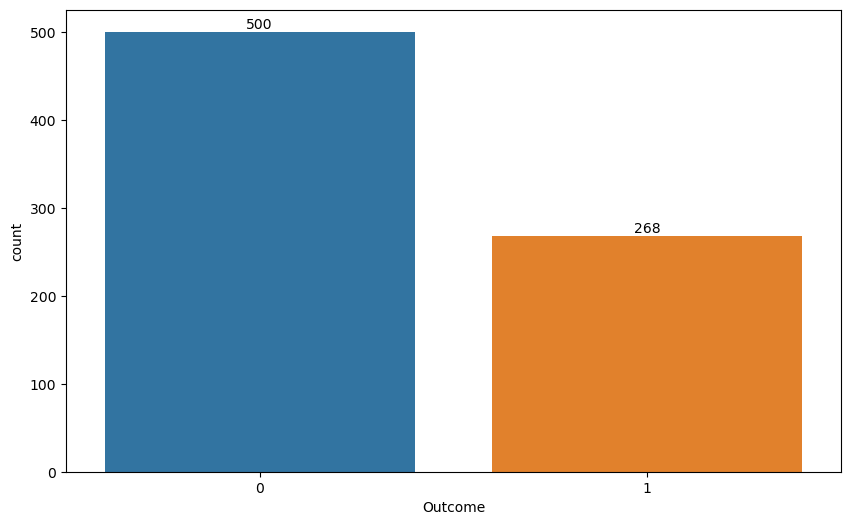

In [10]:
ax = sns.countplot(x='Outcome', data=df)
ax.bar_label(ax.containers[0]);

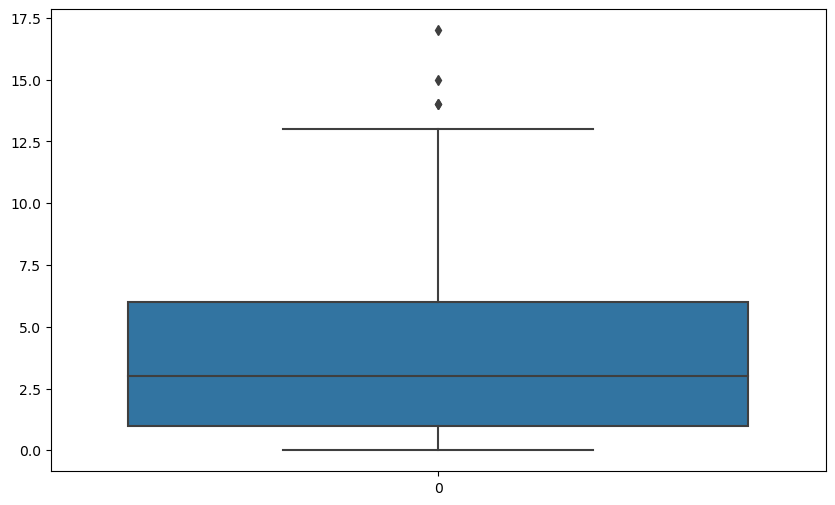

In [11]:
sns.boxplot(df.Pregnancies);

<Axes: >

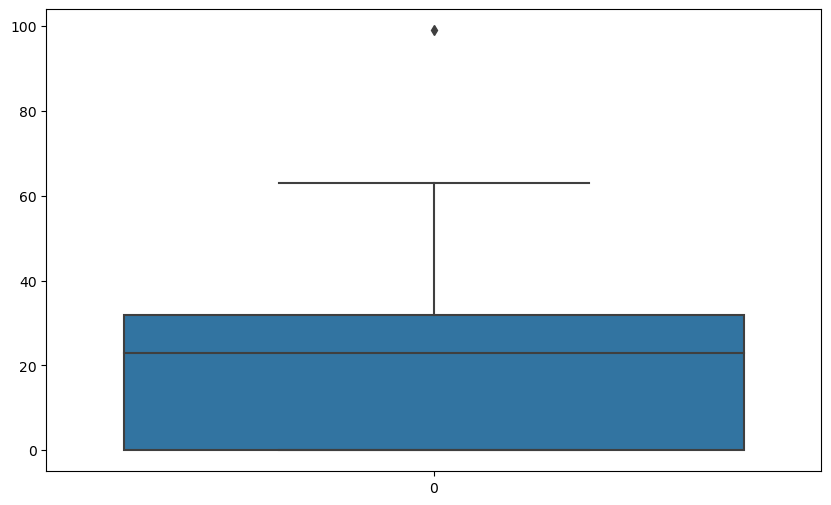

In [12]:
sns.boxplot(df.SkinThickness)

In [13]:
df = df[df.SkinThickness < 70]

<Axes: >

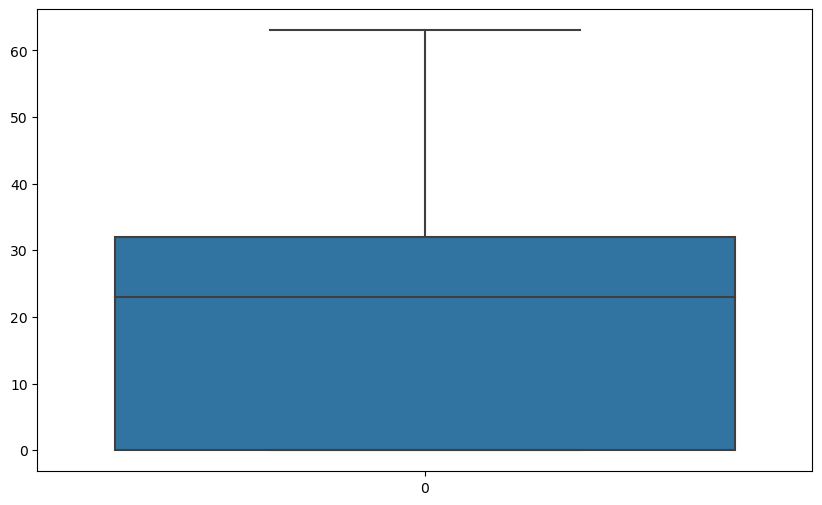

In [14]:
sns.boxplot(df.SkinThickness)

<Axes: >

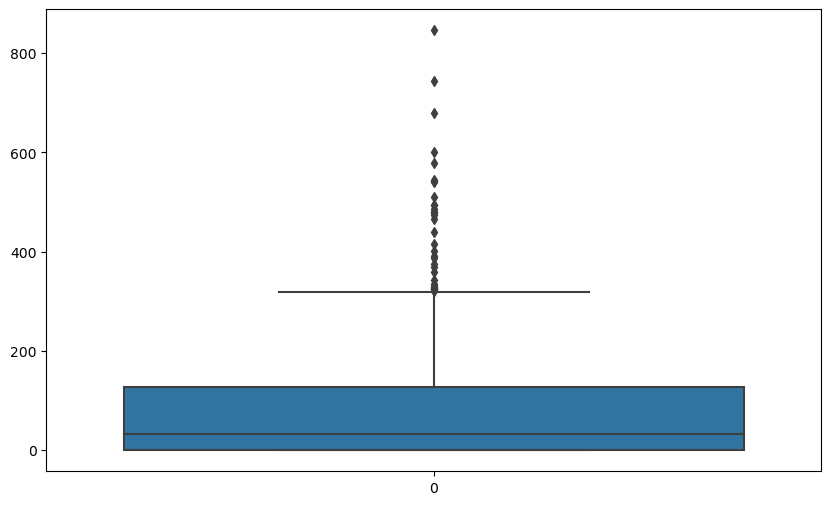

In [15]:
sns.boxplot(df.Insulin)

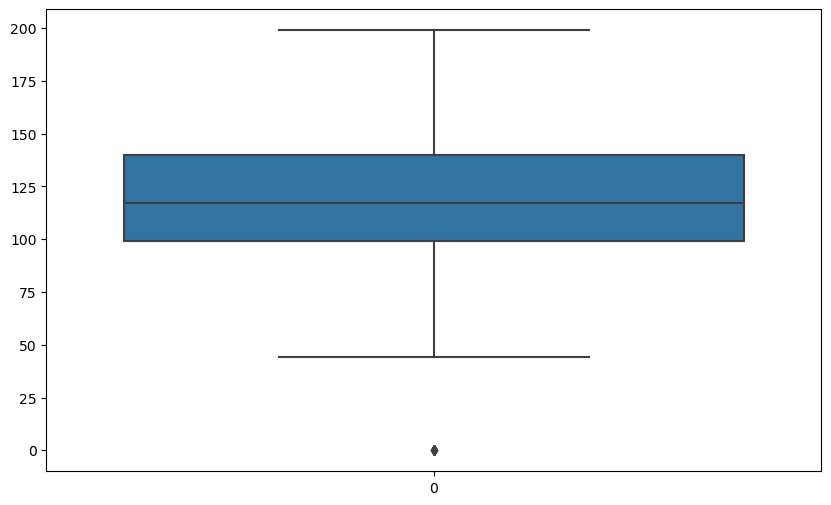

In [16]:
sns.boxplot(df.Glucose);

In [17]:
df = df[df.Glucose>0]

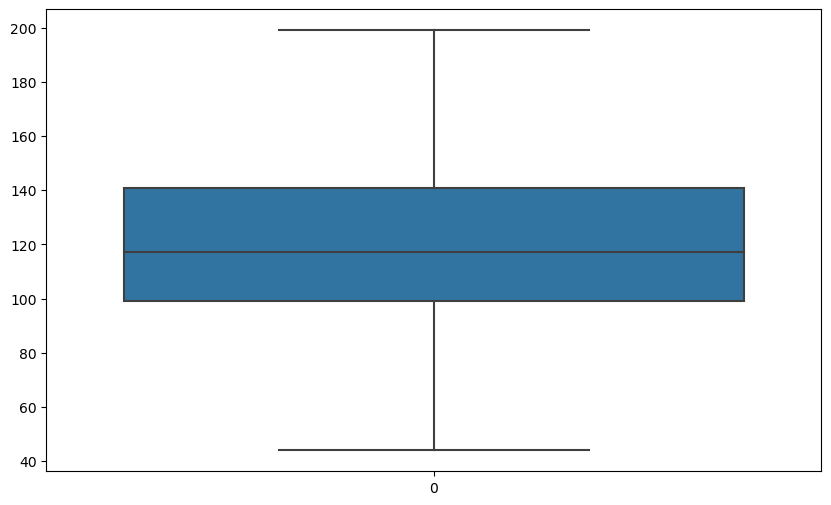

In [18]:
sns.boxplot(df.Glucose);

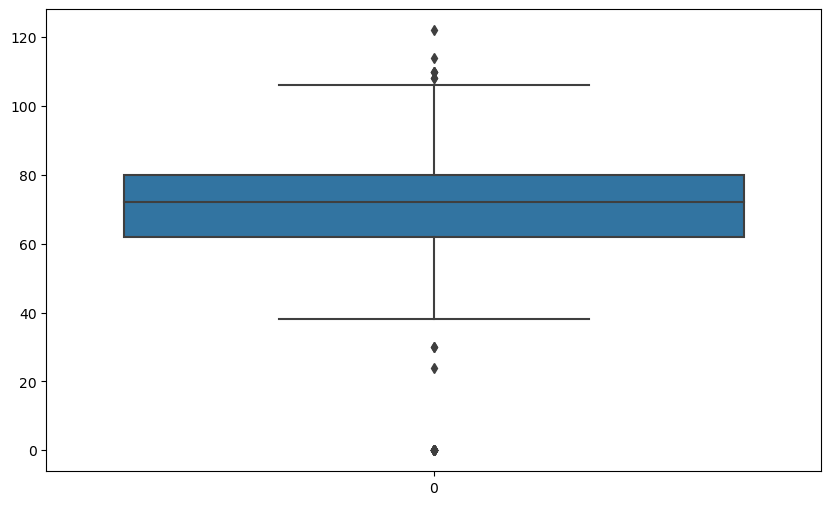

In [19]:
sns.boxplot(df.BloodPressure);

In [20]:
df = df[df.BloodPressure>35]

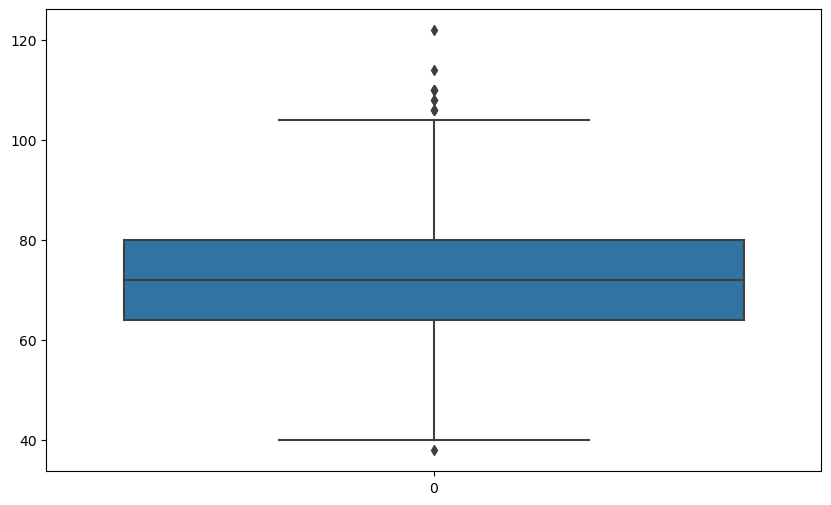

In [21]:
sns.boxplot(df.BloodPressure);

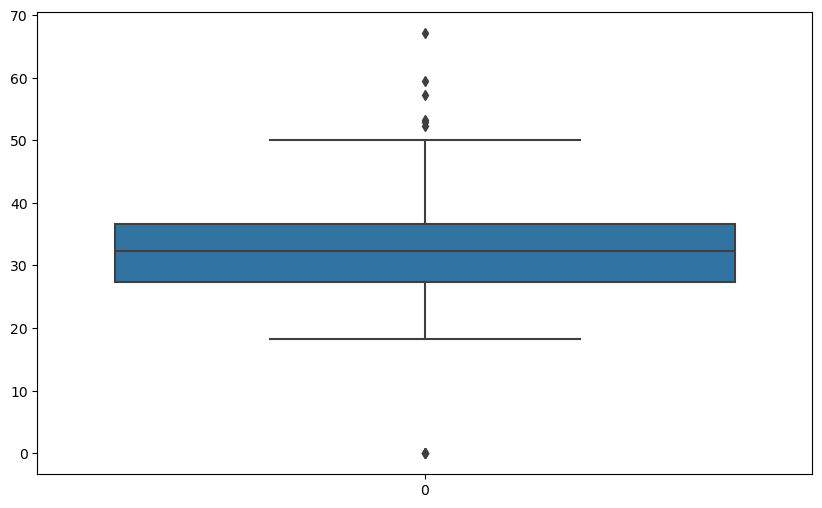

In [22]:
sns.boxplot(df.BMI);


In [23]:
df = df[df.BMI>0]

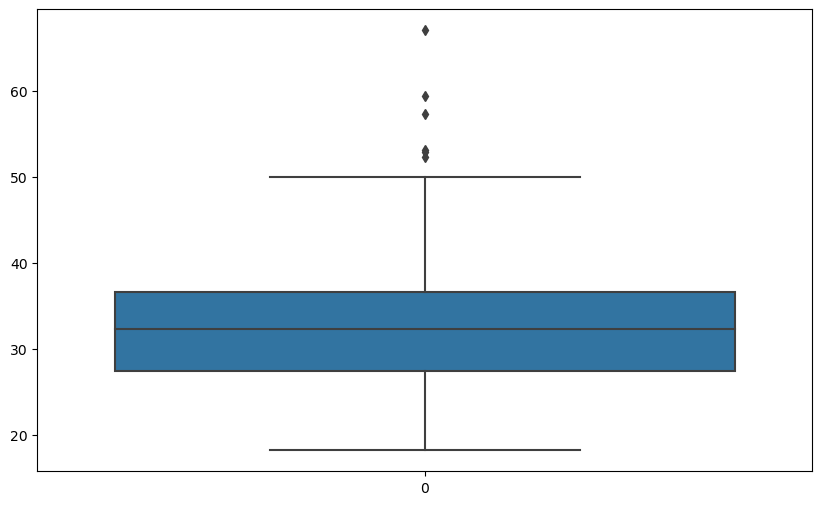

In [24]:
sns.boxplot(df.BMI);

In [25]:
df.shape

(720, 9)

In [26]:
df.Outcome.value_counts()

Outcome
0    473
1    247
Name: count, dtype: int64

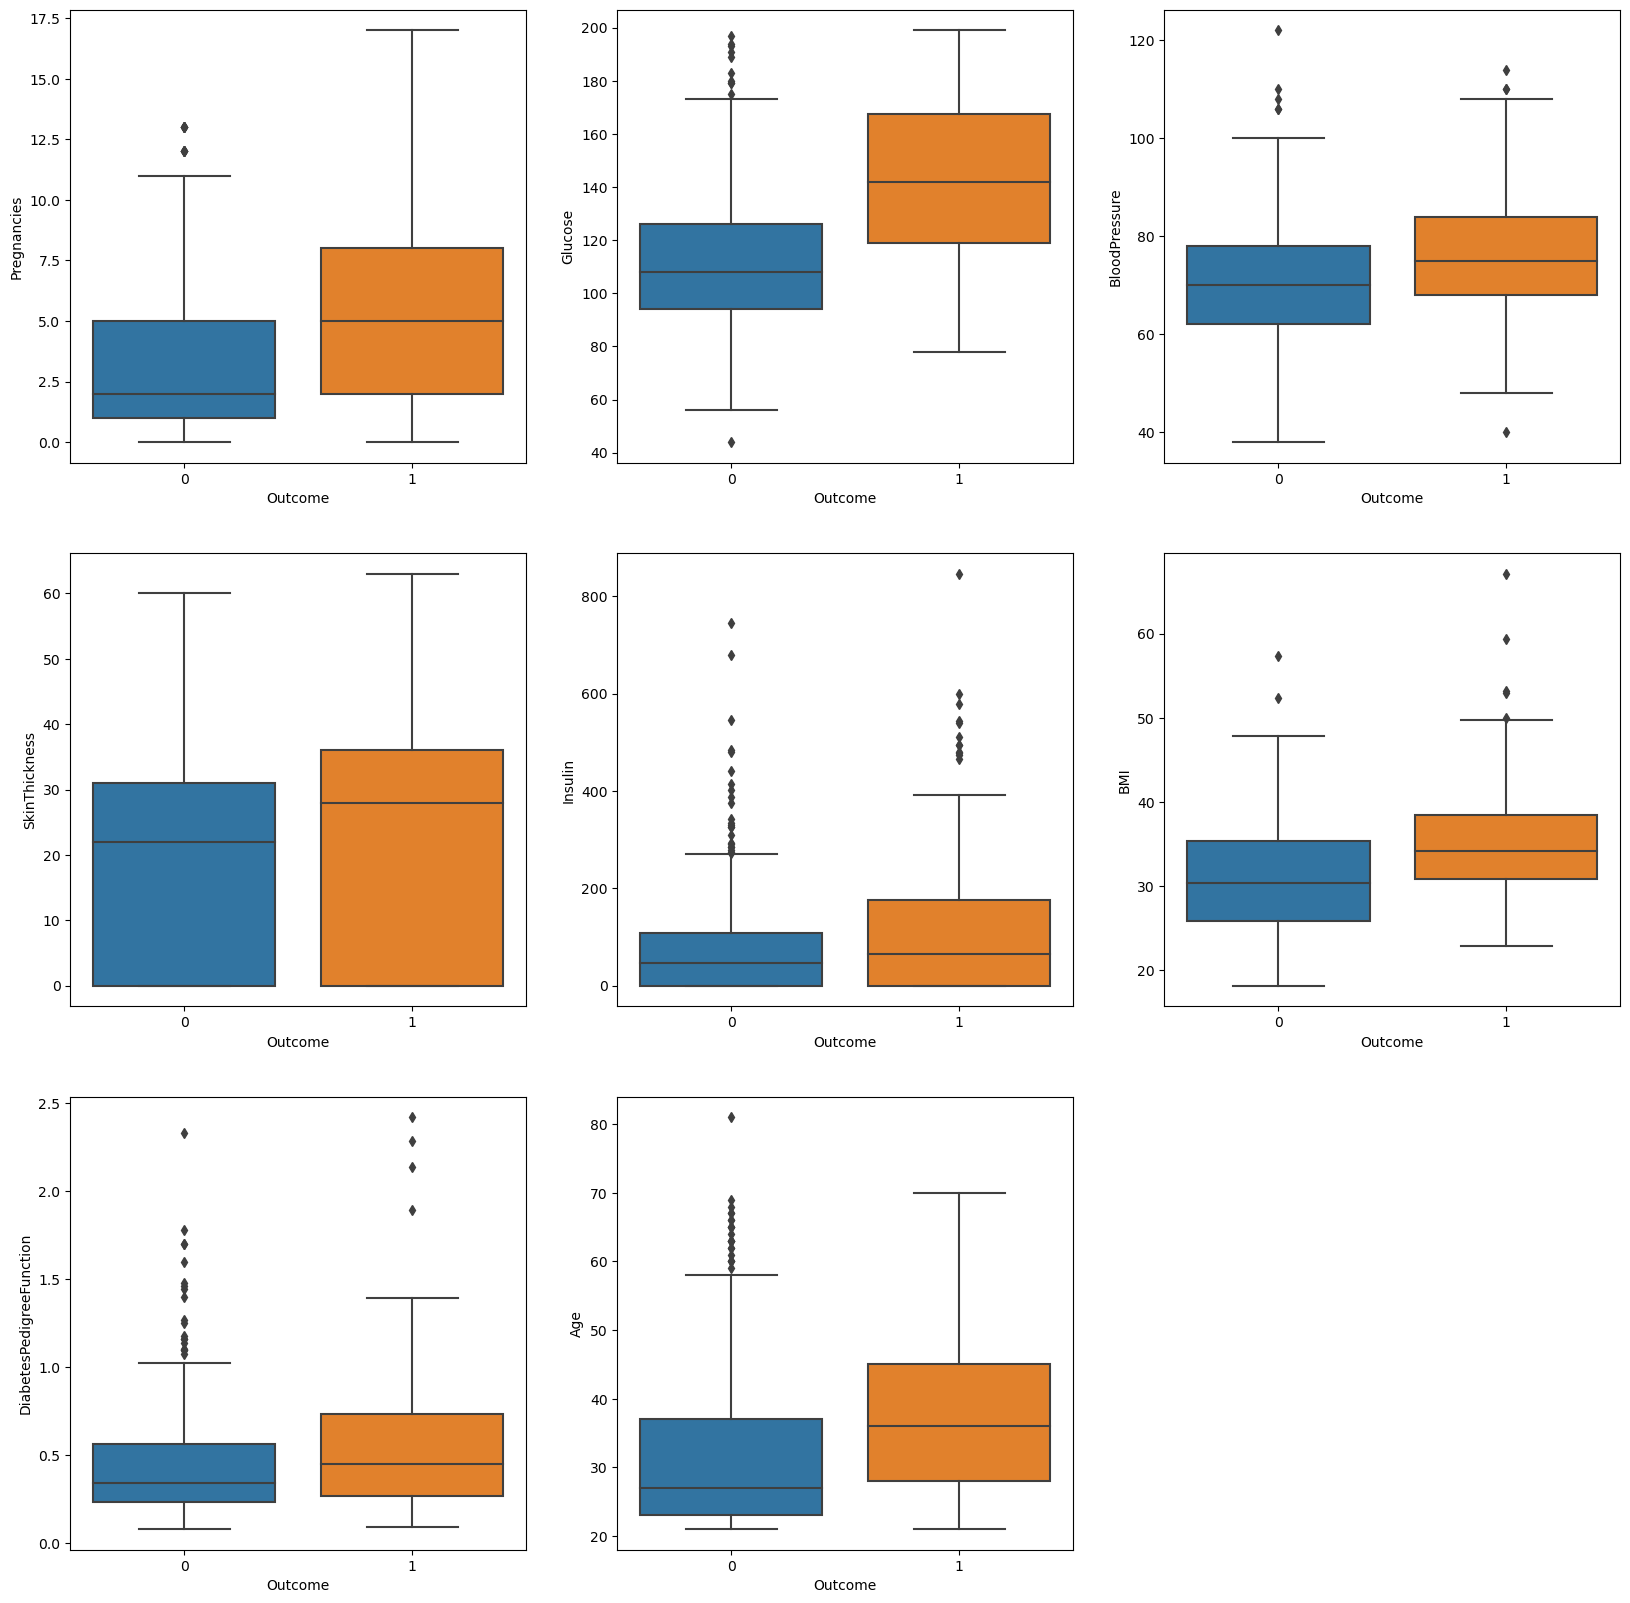

In [27]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

In [28]:
import plotly.express as px
plt.figure(figsize=(10,8))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

<Figure size 1000x800 with 0 Axes>

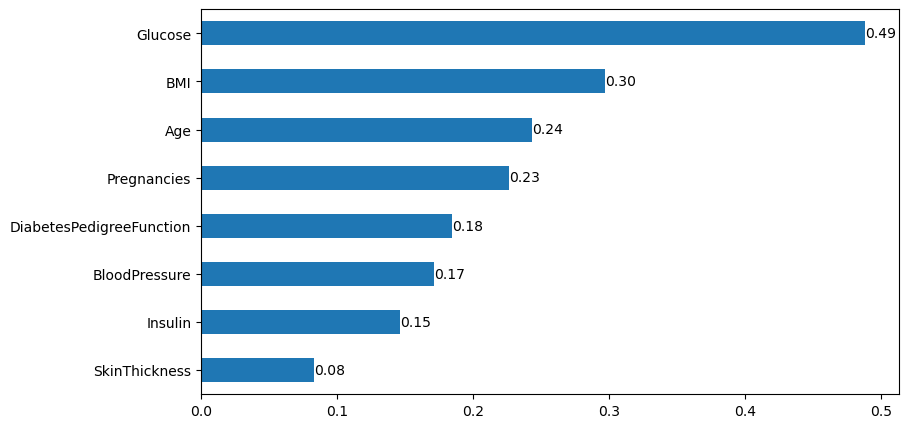

In [29]:
plt.figure(figsize=(9,5))
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

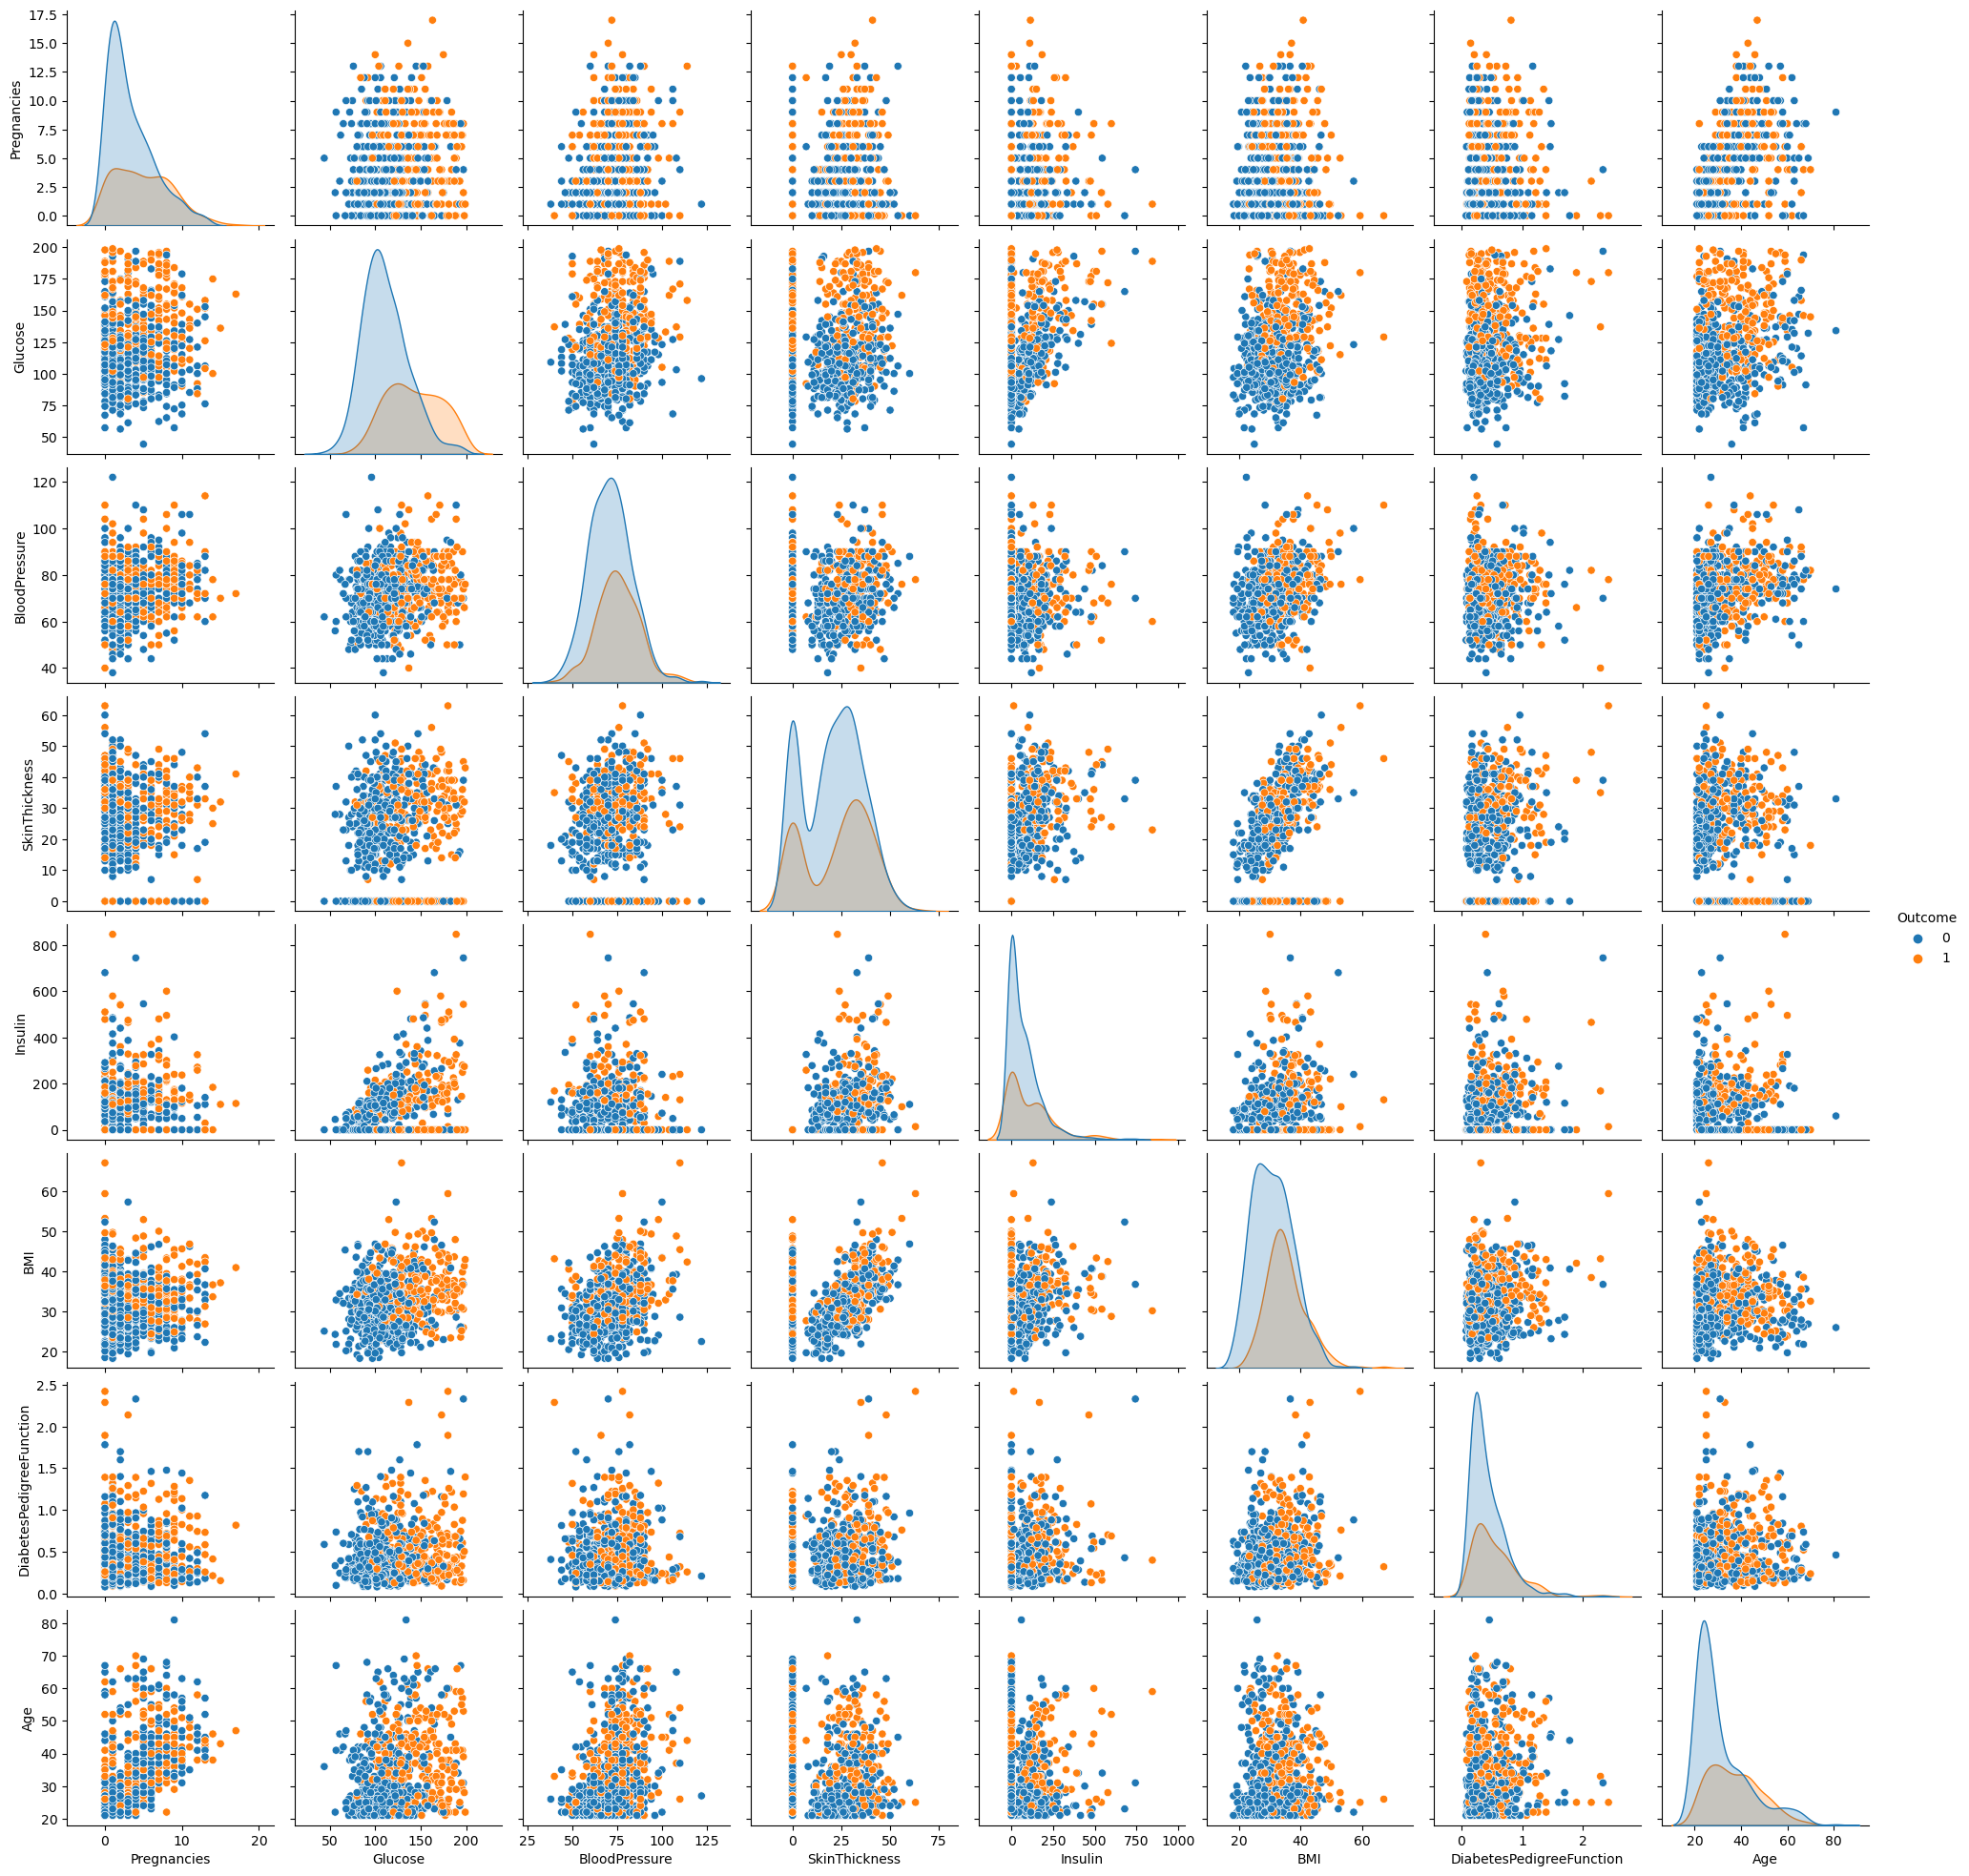

In [30]:
sns.pairplot(df, hue = "Outcome");

# Train | Test Split

In [31]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Outcome
0    0.680556
1    0.319444
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# When splitting classification data into train and test sets, we must use the `stratify=y` parameter if our 
# data is unbalanced. The stratify parameter maintains the ratio of 0 and 1 classes in both the train and test data.

# If this parameter is not used in unbalanced datasets, the minority class may be distributed unevenly 
# in the train or test set, which naturally lowers the scores of the unbalanced class.

# You can use `stratify=y` whether your data is balanced or unbalanced.

In [36]:
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.65625
1    0.34375
Name: proportion, dtype: float64

Outcome
0    0.659722
1    0.340278
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


# Modelling

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [38]:
operations  = [('scaler', StandardScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [39]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[0.23367936, 0.76632064],
       [0.11960923, 0.88039077],
       [0.58160166, 0.41839834],
       [0.81462592, 0.18537408],
       [0.19181772, 0.80818228],
       [0.91051658, 0.08948342],
       [0.7639345 , 0.2360655 ],
       [0.13932957, 0.86067043],
       [0.97125901, 0.02874099],
       [0.88970007, 0.11029993],
       [0.71503222, 0.28496778],
       [0.75805504, 0.24194496],
       [0.82996045, 0.17003955],
       [0.81260234, 0.18739766],
       [0.0974634 , 0.9025366 ],
       [0.98344478, 0.01655522],
       [0.84875214, 0.15124786],
       [0.30126046, 0.69873954],
       [0.62398487, 0.37601513],
       [0.92736542, 0.07263458],
       [0.54071098, 0.45928902],
       [0.97778171, 0.02221829],
       [0.22511415, 0.77488585],
       [0.88700925, 0.11299075],
       [0.76148606, 0.23851394],
       [0.69324508, 0.30675492],
       [0.89994734, 0.10005266],
       [0.57209896, 0.42790104],
       [0.73984559, 0.26015441],
       [0.8399177 , 0.1600823 ],
       [0.

In [41]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data['pred'] = y_pred
test_data['pred_proba'] = y_pred_proba[:, 1]
test_data.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
673            3      123            100             35      240  57.3   
561            0      198             66             32      274  41.3   
374            2      122             52             43      158  36.2   
70             2      100             66             20       90  32.9   
2              8      183             64              0        0  23.3   
565            2       95             54             14       88  26.1   
168            4      110             66              0        0  31.9   
469            6      154             78             41      140  46.1   
68             1       95             66             13       38  19.6   
226            0      101             76              0        0  35.7   
275            2      100             70             52       57  40.5   
93             4      134             72              0        0  23.8   
329            6      105             70             32       68  30.8   
735            4       95             60             32        0  35.4   
327           10      179             70              0        0  35.1   
537            0       57             60              0        0  21.7   
122            2      107             74             30      100  33.6   
394            4      158             78              0        0  32.9   
282            7      133             88             15      155  32.4   
89             1      107             68             19        0  26.5   

     DiabetesPedigreeFunction  Age  Outcome  pred  pred_proba  
673                     0.880   22        0     1    0.766321  
561                     0.502   28        1     1    0.880391  
374                     0.816   28        0     0    0.418398  
70                      0.867   28        1     0    0.185374  
2                       0.672   32        1     1    0.808182  
565                     0.748   22        0     0    0.089483  
168                     0.471   29        0     0    0.236065  
469                     0.571   27        0     1    0.860670  
68                      0.334   25        0     0    0.028741  
226                     0.198   26        0     0    0.110300  
275                     0.677   25        0     0    0.284968  
93                      0.277   60        1     0    0.241945  
329                     0.122   37        0     0    0.170040  
735                     0.284   28        0     0    0.187398  
327                     0.200   37        0     1    0.902537  
537                     0.735   67        0     0    0.016555  
122                     0.404   23        0     0    0.151248  
394                     0.803   31        1     1    0.698740  
282                     0.262   37        0     0    0.376015  
89                      0.165   24        0     0    0.072635

## Model Performance on Classification Tasks

**When Should We Look at Macro Scores, and When Should We Look at Accuracy?**

Imbalanced datasets are situations where some classes have significantly more examples than others. For example, in a model diagnosing a disease, the number of negative examples (those without the disease) might be much higher than the positive examples (those with the disease). In such cases, there is a risk that the model will learn the majority class (negative examples) and ignore the minority class (positive examples). It's important to understand which metrics should be used in these kinds of imbalanced datasets.

**Macro Metrics**

In imbalanced datasets, we need to look at "macro" metrics. Macro metrics take the simple average of performance metrics calculated separately for each class. For instance, the "macro F1 score" is the arithmetic mean of the F1 scores calculated separately for each class. This makes it harder to overlook the performance of the minority class and ensures that the model learns all classes in a balanced way.

**Features of Macro Metrics:**
- Evaluate the performance of each class separately.
- Show whether the model learns all classes in a balanced way.
- Make it difficult to ignore the performance of minority classes.

**Accuracy Metrics**

The accuracy metric can often be misleading in imbalanced datasets. If a model consistently predicts the majority class correctly, it can achieve a high accuracy score. This does not mean the model performs well on the minority class. Therefore, in imbalanced datasets, "macro" metrics are preferred over accuracy.

**Limitations of Accuracy Metrics:**
- Can be misleading in imbalanced datasets.
- May ignore the performance of minority classes even if the majority class is predicted correctly.
- Does not reflect the model's success in learning minority classes.

**Conclusion**

Using macro metrics to evaluate model performance in imbalanced datasets provides a more accurate approach as they assess each class's performance separately and do not ignore the performance of minority classes. The accuracy metric should be used cautiously in imbalanced datasets, as it can be misleading.

Focusing on macro metrics is the best approach if a balanced performance across all classes is desired. This ensures that the model performs well not only on the majority class but also on minority classes, providing a more holistic view of overall model performance.

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

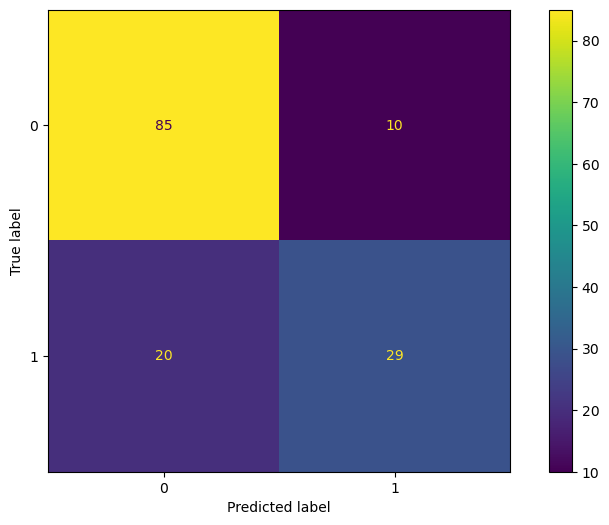

In [43]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

In [44]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [45]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [46]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [47]:
operations  = [('scaler', StandardScaler()), ('logistic', LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10) # default 5
# In each iteration, it places the classes of "y" into the train and test sets with the initial ratio.

scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1'],
                       cv = cv, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1   0.005508    0.013536       0.706897        0.776062        0.600000   
2   0.004576    0.009532       0.724138        0.785714        0.642857   
3   0.005522    0.009033       0.844828        0.766409        0.923077   
4   0.005015    0.010025       0.827586        0.768340        0.857143   
5   0.005520    0.008772       0.775862        0.776062        0.705882   
6   0.005006    0.009037       0.741379        0.776062        0.647059   
7   0.004511    0.008514       0.771930        0.770713        0.714286   
8   0.004511    0.008013       0.754386        0.772640        0.647059   
9   0.005005    0.008517       0.789474        0.761079        0.750000   
10  0.004511    0.009037       0.719298        0.778420        0.625000   

    train_precision  test_recall  train_recall   test_f1  train_f1  
1          0.718310     0.450000      0.573034  0.514286  0.637500  
2          0.744526     0.450000      0.573034  0.529412  0.647619  
3          0.717557     0.600000      0.528090  0.727273  0.608414  
4          0.716418     0.600000      0.539326  0.705882  0.615385  
5          0.727941     0.600000      0.556180  0.648649  0.630573  
6          0.727941     0.550000      0.556180  0.594595  0.630573  
7          0.723881     0.526316      0.541899  0.606061  0.619808  
8          0.719424     0.578947      0.558659  0.611111  0.628931  
9          0.698529     0.600000      0.533708  0.666667  0.605096  
10         0.729927     0.500000      0.561798  0.555556  0.634921

In [48]:
df_scores.mean()[2:]

test_accuracy      0.765578
train_accuracy     0.773150
test_precision     0.711236
train_precision    0.722445
test_recall        0.545526
train_recall       0.552191
test_f1            0.615949
train_f1           0.625882
dtype: float64

In [49]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate for 0 class

In [50]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)


scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

# It is used to select classes other than Class 1, which is assigned by default with `make_score`.
# We can change the class value and apply operations to other classes by using the `pos_label=0` 
# parameter within `f1_score` inside `make_scorer`.
# We must define the metrics we equate to `make_scorer` in a dictionary and assign them to a variable (scoring).

In [51]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)  #default 5

# It places the classes of "y" into the train and test sets in each iteration, maintaining the initial ratio.

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

fit_time  score_time  test_precision_0  train_precision_0  test_recall_0  \
1   0.007526    0.012519          0.744186           0.797872       0.842105   
2   0.005514    0.009021          0.750000           0.800525       0.868421   
3   0.004516    0.010029          0.822222           0.782946       0.973684   
4   0.004509    0.008014          0.818182           0.786458       0.947368   
5   0.004510    0.011035          0.804878           0.793194       0.868421   
6   0.004997    0.007507          0.780488           0.793194       0.842105   
7   0.004512    0.009026          0.790698           0.787013       0.894737   
8   0.005509    0.008017          0.800000           0.792105       0.842105   
9   0.004506    0.007019          0.804878           0.783290       0.891892   
10  0.005238    0.009032          0.756098           0.795812       0.837838   

    train_recall_0  test_f1_0  train_f1_0  
1         0.882353   0.790123    0.837989  
2         0.897059   0.804878    0.846047  
3         0.891176   0.891566    0.833563  
4         0.888235   0.878049    0.834254  
5         0.891176   0.835443    0.839335  
6         0.891176   0.810127    0.839335  
7         0.891176   0.839506    0.835862  
8         0.885294   0.820513    0.836111  
9         0.879765   0.846154    0.828729  
10        0.891496   0.794872    0.840941

In [52]:
df_scores.mean()[2:]

# Consistent with the scores of class 0 in the test set

test_precision_0     0.787163
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.831123
train_f1_0           0.837217
dtype: float64

In [53]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## GridSearchCV

[Logistic Regression Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [54]:
pipe_model.get_params()

# If we are going to use a pipeline model within `GridSearchCV`, we can see the list of hyperparameters for the scaler
# and ML algorithm defined within the pipeline using `get_params()`.

# We should write the hyperparameters that we will include in the `param_grid` parameter of `GridSearchCV` 
# as shown below.

# Notice that after the "logistic" name we gave to the ML model within the pipeline, there are two underscores (`__`), 
# followed by the name of the hyperparameter specific to the ML model.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': 0.0,
 'logistic__max_iter': 100,
 'logistic__n_jobs': None,
 'logistic__penalty': 'deprecated',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [55]:
pipe_model.set_params(logistic__C = 0.1, scaler__with_mean = False) # we can change the default values of hyperparameters

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('logistic', LogisticRegression(C=0.1))])

In [56]:
pipe_model.get_params() # scaler with mean changed to False, and C changed to 0.01

{'memory': None,
 'steps': [('scaler', StandardScaler(with_mean=False)),
  ('logistic', LogisticRegression(C=0.1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(with_mean=False),
 'logistic': LogisticRegression(C=0.1),
 'scaler__copy': True,
 'scaler__with_mean': False,
 'scaler__with_std': True,
 'logistic__C': 0.1,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': 0.0,
 'logistic__max_iter': 100,
 'logistic__n_jobs': None,
 'logistic__penalty': 'deprecated',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Set the parameters and values to improve recall with GridSearchCV, enhancing the score for class 1 and 
# increasing the rate of catching patients. 
operations = [('scaler', StandardScaler()), ('logistic', LogisticRegression())]
model = Pipeline(steps=operations)

penalty = ['l1', 'l2']
C = np.logspace(-1, 5, 20)
class_weight = ['balanced', None]# it will solve if unbalance present

# In unbalanced datasets, we can use `class_weight="balanced"` to balance the classes. When the data is balanced, 
# the model tries to increase the precision score of the minority class to improve its recall score.

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class 
# frequencies in the input data.
solver = ["lbfgs", "liblinear", "sag", "saga"] # By default, lbfgs is not changed much. We provided it to see everything. 

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10) #shuffle = True, random_state = 42

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   # By default, it maximizes the score of class 1. 
#                           If you want to maximize the score of class 0, use f1_0 = make_scorer(f1_score, pos_label=0).
                          n_jobs = -1,
                          return_train_score=True)

# Since `GridSearchCV` also performs cross-validation, we set `return_train_score=True` to obtain both validation and 
# train set scores. (The metric specified in `scoring` will only return that score).

In [59]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [60]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [61]:
grid_model.best_estimator_

# `best_estimator_` does not return the default hyperparameters; it only returns those that are different from the 
# default values.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [62]:
grid_model.best_index_

1

In [63]:
pd.DataFrame(grid_model.cv_results_).loc[1, ['mean_test_score', 'mean_train_score']]

# The "mean_test_score" and "mean_train_score" are extracted from the relevant DataFrame's best index and compared 
# to evaluate overfitting and underfitting.

# Since `GridSearchCV` also performs cross-validation, we don't need to perform additional cross-validation.

# The scores we get here are the scores of the scoring metric we provided to `GridSearchCV`.

mean_test_score     0.737895
mean_train_score      0.7514
Name: 1, dtype: object

In [64]:
grid_model.best_score_

0.7378947368421053

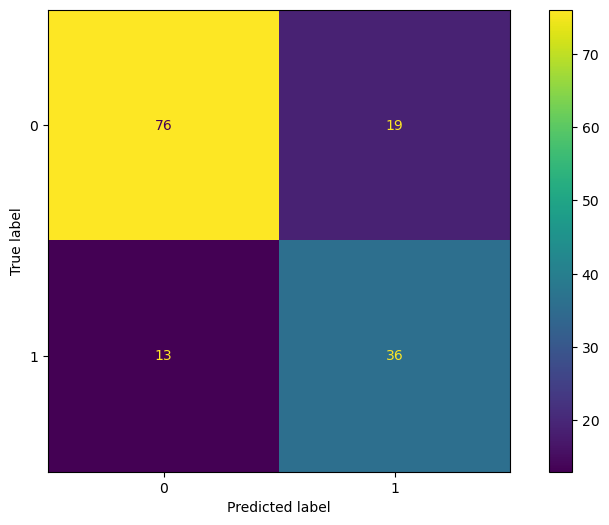

In [65]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [66]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



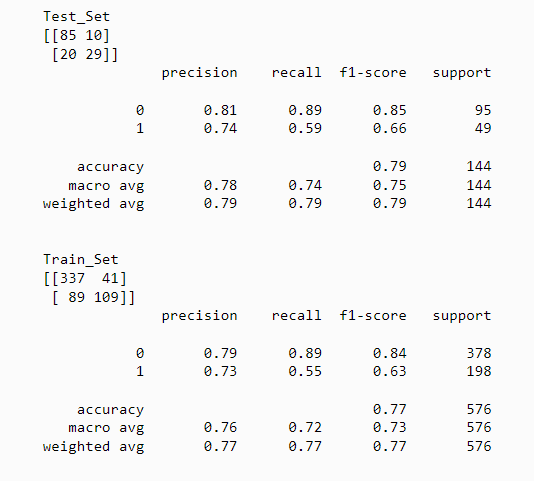

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

[Threshold Optimization](https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7el)

In [68]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

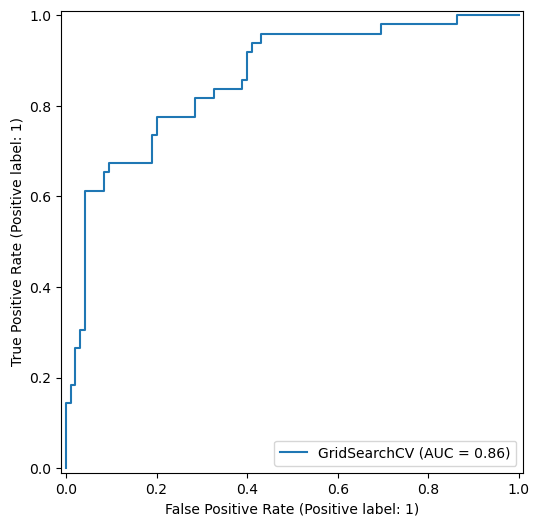

In [69]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

# This curve makes a biased interpetation in unbalanced dataset.
# not good for unbalanced dataset.

## Precision Recall Curve

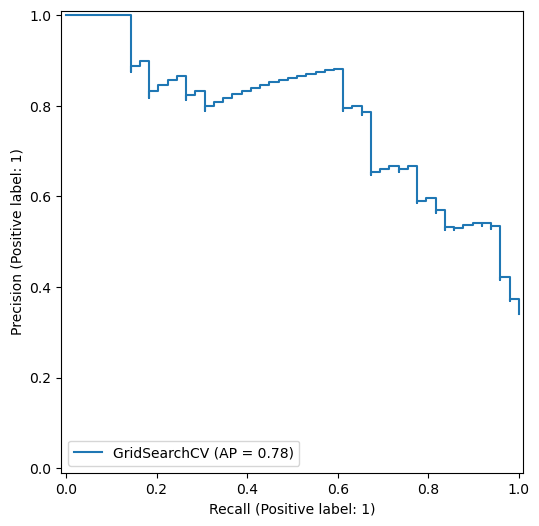

In [71]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

# this curve makes accurate interpretations in unbalanced datasets

# Finding Best Thresholds

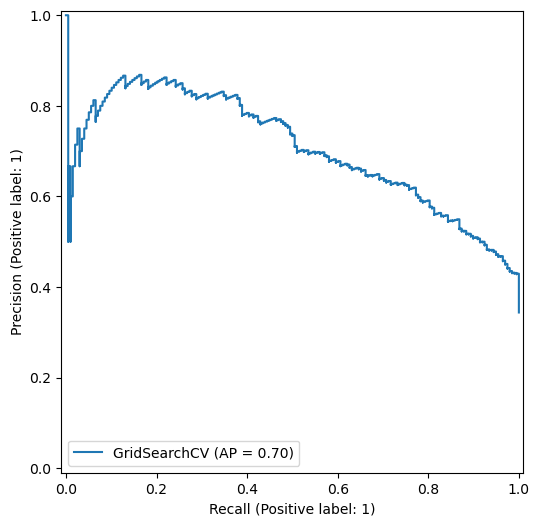

In [72]:
PrecisionRecallDisplay.from_estimator(grid_model, X_train, y_train);


In [73]:
y_train_pred_prob = grid_model.predict_proba(X_train)

In [77]:
precision_recall_curve(y_train, y_train_pred_prob[:, 1])
# this function gives the numerical equivalent of precision recall curve, and what each point 
# in that curve shows in terms of precision recall and threshold

(array([0.34375   , 0.34434783, 0.34494774, 0.34554974, 0.34615385,
        0.34676007, 0.34736842, 0.34797891, 0.34859155, 0.34920635,
        0.34982332, 0.35044248, 0.35106383, 0.35168739, 0.35231317,
        0.35294118, 0.35357143, 0.35420394, 0.35483871, 0.35547576,
        0.35611511, 0.35675676, 0.35740072, 0.35804702, 0.35869565,
        0.35934664, 0.36      , 0.36065574, 0.36131387, 0.36197441,
        0.36263736, 0.36330275, 0.36397059, 0.36464088, 0.36531365,
        0.36598891, 0.36666667, 0.36734694, 0.36802974, 0.36871508,
        0.36940299, 0.37009346, 0.37078652, 0.37148218, 0.37218045,
        0.37288136, 0.37358491, 0.37429112, 0.375     , 0.37571157,
        0.37642586, 0.37714286, 0.3778626 , 0.37858509, 0.37931034,
        0.38003839, 0.38076923, 0.38150289, 0.38223938, 0.38297872,
        0.38372093, 0.38446602, 0.38521401, 0.38596491, 0.38671875,
        0.38747554, 0.38823529, 0.38899804, 0.38976378, 0.39053254,
        0.39130435, 0.39207921, 0.39285714, 0.39

In [76]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_prob[:, 1])
# this function, gives each point of precision recall curve, what recall value
# it coincides with, and what precision score it coincides with, based on different
# threshold values

In [ ]:
dict = {"precisions":precisions[:-1], "recalls":recalls[:-1], "threshold":thresholds}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric

# Since the precision and recall values are one less than the thresholds, we ignore the last values of precision 
# and recall.

# We first sort the `df_metric` scores by recall, then by precision scores.

# The sorting here returns the highest precision score corresponding to our target recall score.

# My goal is to achieve maximum recall with maximum precision.

precisions   recalls  threshold
115    0.429501  1.000000   0.224458
114    0.428571  1.000000   0.222738
113    0.427646  1.000000   0.221434
112    0.426724  1.000000   0.217898
111    0.425806  1.000000   0.216213
..          ...       ...        ...
571    0.600000  0.015152   0.963331
573    0.666667  0.010101   0.969827
572    0.500000  0.010101   0.964119
575    1.000000  0.005051   0.988414
574    0.500000  0.005051   0.977213

[576 rows x 3 columns]

In [79]:
with pd.option_context('display.max_rows', None):
    display(df_metric)

precisions   recalls  threshold
115    0.429501  1.000000   0.224458
114    0.428571  1.000000   0.222738
113    0.427646  1.000000   0.221434
112    0.426724  1.000000   0.217898
111    0.425806  1.000000   0.216213
110    0.424893  1.000000   0.215576
109    0.423983  1.000000   0.214834
108    0.423077  1.000000   0.212998
107    0.422175  1.000000   0.211474
106    0.421277  1.000000   0.211131
105    0.420382  1.000000   0.211068
104    0.419492  1.000000   0.207752
103    0.418605  1.000000   0.206254
102    0.417722  1.000000   0.204704
101    0.416842  1.000000   0.203898
100    0.415966  1.000000   0.203698
99     0.415094  1.000000   0.202186
98     0.414226  1.000000   0.200864
97     0.413361  1.000000   0.198370
96     0.412500  1.000000   0.198101
95     0.411642  1.000000   0.197925
94     0.410788  1.000000   0.194560
93     0.409938  1.000000   0.194022
92     0.409091  1.000000   0.193093
91     0.408247  1.000000   0.192745
90     0.407407  1.000000   0.189752
89     0.406571  1.000000   0.188881
88     0.405738  1.000000   0.188283
87     0.404908  1.000000   0.187157
86     0.404082  1.000000   0.185476
85     0.403259  1.000000   0.184621
84     0.402439  1.000000   0.184455
83     0.401623  1.000000   0.184088
82     0.400810  1.000000   0.183462
81     0.400000  1.000000   0.182929
80     0.399194  1.000000   0.181518
79     0.398390  1.000000   0.180995
78     0.397590  1.000000   0.180092
77     0.396794  1.000000   0.177358
76     0.396000  1.000000   0.173559
75     0.395210  1.000000   0.172004
74     0.394422  1.000000   0.170001
73     0.393638  1.000000   0.168503
72     0.392857  1.000000   0.168486
71     0.392079  1.000000   0.166243
70     0.391304  1.000000   0.165795
69     0.390533  1.000000   0.164955
68     0.389764  1.000000   0.164449
67     0.388998  1.000000   0.164238
66     0.388235  1.000000   0.162801
65     0.387476  1.000000   0.162560
64     0.386719  1.000000   0.162359
63     0.385965  1.000000   0.162053
62     0.385214  1.000000   0.161584
61     0.384466  1.000000   0.161322
60     0.383721  1.000000   0.158760
59     0.382979  1.000000   0.158685
58     0.382239  1.000000   0.156559
57     0.381503  1.000000   0.155433
56     0.380769  1.000000   0.155326
55     0.380038  1.000000   0.154862
54     0.379310  1.000000   0.154167
53     0.378585  1.000000   0.153810
52     0.377863  1.000000   0.151455
51     0.377143  1.000000   0.151387
50     0.376426  1.000000   0.148882
49     0.375712  1.000000   0.147306
48     0.375000  1.000000   0.147145
47     0.374291  1.000000   0.146627
46     0.373585  1.000000   0.146063
45     0.372881  1.000000   0.140684
44     0.372180  1.000000   0.138744
43     0.371482  1.000000   0.138297
42     0.370787  1.000000   0.136863
41     0.370093  1.000000   0.133335
40     0.369403  1.000000   0.132485
39     0.368715  1.000000   0.132406
38     0.368030  1.000000   0.130772
37     0.367347  1.000000   0.130129
36     0.366667  1.000000   0.125943
35     0.365989  1.000000   0.125078
34     0.365314  1.000000   0.123274
33     0.364641  1.000000   0.122824
32     0.363971  1.000000   0.122409
31     0.363303  1.000000   0.122292
30     0.362637  1.000000   0.121169
29     0.361974  1.000000   0.120411
28     0.361314  1.000000   0.117307
27     0.360656  1.000000   0.115656
26     0.360000  1.000000   0.115347
25     0.359347  1.000000   0.114522
24     0.358696  1.000000   0.113705
23     0.358047  1.000000   0.113547
22     0.357401  1.000000   0.113542
21     0.356757  1.000000   0.112774
20     0.356115  1.000000   0.112274
19     0.355476  1.000000   0.111505
18     0.354839  1.000000   0.109956
17     0.354204  1.000000   0.109355
16     0.353571  1.000000   0.105185
15     0.352941  1.000000   0.104991
14     0.352313  1.000000   0.103834
13     0.351687  1.000000   0.101097
12     0.351064  1.000000   0.098580
11     0.350442  1.000000   0.094332
10     0.349823  1.000000   0.094157
9      0.349206  1.000000   0.091859
8      0.

In [80]:
optimal_threshold = 0.228122

In [81]:
class_1_proba = grid_model.predict_proba(X_test)[:, 1]
class_1_proba

array([0.86114751, 0.91896218, 0.54017068, 0.32835317, 0.84585634,
       0.19021739, 0.37229962, 0.89304544, 0.09180284, 0.23759831,
       0.42219903, 0.4004945 , 0.32150828, 0.29623082, 0.91146405,
       0.04580701, 0.31485417, 0.7783868 , 0.60681794, 0.17502779,
       0.59123953, 0.07183883, 0.85620345, 0.26773084, 0.3589937 ,
       0.42664954, 0.2136146 , 0.54009321, 0.47726293, 0.26627032,
       0.322198  , 0.47418162, 0.599711  , 0.29605382, 0.92992311,
       0.16407283, 0.56703242, 0.37504581, 0.66448139, 0.17884089,
       0.22571563, 0.10910056, 0.11562852, 0.76816578, 0.45675041,
       0.48416999, 0.45123193, 0.84200569, 0.89861702, 0.48443386,
       0.31845205, 0.22799181, 0.45360463, 0.06128484, 0.08594465,
       0.87896801, 0.65057798, 0.21427992, 0.72028193, 0.53911383,
       0.81872742, 0.62132103, 0.7600269 , 0.91815138, 0.8438359 ,
       0.17312375, 0.33792077, 0.3685675 , 0.96338854, 0.10318289,
       0.50367394, 0.22024152, 0.76703387, 0.24149032, 0.65056

In [82]:
y_pred
# prediction based on threshold value 0.55

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [83]:
y_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba]
y_pred2

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1]

In [84]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[30 65]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.94      0.32      0.47        95
           1       0.42      0.96      0.58        49

    accuracy                           0.53       144
   macro avg       0.68      0.64      0.53       144
weighted avg       0.76      0.53      0.51       144



In [85]:
class_1_proba_train = grid_model.predict_proba(X_train)[:,1]

y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba_train]

print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

# We perform the same operation for the train set as well.

[[118 260]
 [  2 196]]
              precision    recall  f1-score   support

           0       0.98      0.31      0.47       378
           1       0.43      0.99      0.60       198

    accuracy                           0.55       576
   macro avg       0.71      0.65      0.54       576
weighted avg       0.79      0.55      0.52       576



In [67]:
# !pip install ipywidgets
# !pip install IPython

In [86]:
from ipywidgets import interactive, FloatSlider
from IPython.display import display

In [87]:
y_pred = grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)

In [88]:
def generate_confusion_matrix(threshold):
    y_pred = (y_pred_proba[:, -1] >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f_1 = f1_score(y_test, y_pred)

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Threshold = {threshold:.2f})')

    # Add text below the graph
    plt.text(0.5, -0.20, f'Precision: {precision:.2f}\nRecall: {recall:.2f}\nAccuracy: {accuracy:.2f}\nf1-score: {f_1:.2f}',
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.show()

# Create interactive slider
threshold_slider = FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, description='Threshold')

# Create interactive widget
interactive_plot = interactive(generate_confusion_matrix, threshold=threshold_slider)

# Display the interactive widget
display(interactive_plot)

interactive(children=(FloatSlider(value=0.5, description='Threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [89]:
# Cross validation with optimal treshold

from sklearn.model_selection import StratifiedKFold

def CV(n, model, X, y, optimal_threshold=0.224456):
    skf = StratifiedKFold(n_splits = n) #shuffle = True, random_state = 42
    
    acc_scores = []
    test_pre_scores = []
    test_rec_scores = []
    test_f1_scores  = []
    
    train_pre_scores = []
    train_rec_scores = []
    train_f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        model = model
        model.fit(X_train, y_train)
        
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred2 = [1 if i >= optimal_threshold else 0 for i in y_pred_proba]
        
        
        y_train_pred_proba = model.predict_proba(X_train)[:,1]
        y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in y_train_pred_proba]
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        
        test_pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        test_rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        test_f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
        
        train_pre_scores.append(precision_score(y_train, y_train_pred2, pos_label=1))
        train_rec_scores.append(recall_score(y_train, y_train_pred2, pos_label=1))
        train_f1_scores.append(f1_score(y_train, y_train_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>15,.2f}%  std {np.std(acc_scores)*100:.2f}%\n')
    
    print(f'Test_Precision-1 {np.mean(test_pre_scores)*100:>7,.2f}%  std {np.std(test_pre_scores)*100:.2f}%')
    print(f'Train_Precision-1 {np.mean(train_pre_scores)*100:>6,.2f}%  std {np.std(train_pre_scores)*100:.2f}%\n')
    
    print(f'Test_Recall-1 {np.mean(test_rec_scores)*100:>10,.2f}%  std {np.std(test_rec_scores)*100:.2f}%')
    print(f'Train_Recall-1 {np.mean(train_rec_scores)*100:>9,.2f}%  std {np.std(train_rec_scores)*100:.2f}%\n')
    
    print(f'Test_F1_score-1 {np.mean(test_f1_scores)*100:>8,.2f}%  std {np.std(test_f1_scores)*100:.2f}%')
    print(f'Train_F1_score-1 {np.mean(train_f1_scores)*100:>7,.2f}%  std {np.std(train_f1_scores)*100:.2f}%')
    
# We can't use the classic cross-validation function we know for the optimal threshold. That's why we use the 
# manually written code here. The reason for looking at the standard deviation of the scores along with the scores 
# themselves is to see how similar the scores are to each other.

In [90]:
model = LogisticRegression(C=0.1, class_weight='balanced',penalty='l1', solver='liblinear')
CV(10, model, X_train, y_train)

Accuracy           41.13%  std 2.89%

Test_Precision-1   36.52%  std 1.55%
Train_Precision-1  36.77%  std 0.49%

Test_Recall-1      96.47%  std 4.51%
Train_Recall-1     97.03%  std 0.26%

Test_F1_score-1    52.97%  std 2.12%
Train_F1_score-1   53.33%  std 0.53%


# Final Model and Model Deployment

In [91]:
operations = [('scaler', StandardScaler()), ('logistic', LogisticRegression(C=0.1, class_weight='balanced',
                                                                            penalty='l1', solver='liblinear'))]
fina_model_diabetes = Pipeline(steps=operations)
fina_model_diabetes.fit(X, y)

# building the final model with the best hyperparameters we found after gridsearch

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [92]:
import pickle

In [93]:
pickle.dump(fina_model_diabetes, open("final_pipe_model_diab", 'wb'))

In [94]:
new_model = pickle.load(open('final_pipe_model_diab', 'rb'))

In [95]:
X.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   720.000000  720.000000     720.000000     720.000000  720.000000   
mean      3.880556  121.897222      72.588889      21.287500   84.676389   
std       3.366308   30.649311      12.075234      15.476731  117.276853   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000  100.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      24.000000   48.000000   
75%       6.000000  142.000000      80.000000      33.000000  132.000000   
max      17.000000  199.000000     122.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  720.000000                720.000000  720.000000  
mean    32.424167                  0.474885   33.338889  
std      6.842008                  0.333024   11.737350  
min     18.200000                  0.078000   21.000000  
25%     27.475000                  0.245000   24.000000  
50%     32.350000                  0.378000   29.000000  
75%     36.600000                  0.629500   41.000000  
max     67.100000                  2.420000   81.000000

In [96]:
my_dict = {"Pregnancies": [3, 4, 5],
           "Glucose": [100, 110, 120],
           "BloodPressure": [75, 80, 70],
           "SkinThickness": [30, 25, 20],
           "Insulin": [80, 120, 130],
           "BMI": [25, 35, 30],
           "DiabetesPedigreeFunction": [0.4, 0.5, 0.6],
           "Age": [30, 40, 35]
          }

# We determine 3 observations based on the minimum and maximum values.

In [97]:
sample = pd.DataFrame(my_dict)
sample

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            3      100             75             30       80   25   
1            4      110             80             25      120   35   
2            5      120             70             20      130   30   

   DiabetesPedigreeFunction  Age  
0                       0.4   30  
1                       0.5   40  
2                       0.6   35

In [98]:
sample_2 = sample.copy()

In [99]:
new_model.predict(sample)

array([0, 0, 0], dtype=int64)

In [100]:
predictions = new_model.predict(sample)
predictions_proba = new_model.predict_proba(sample)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [101]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.22"] = predictions2
sample

# We can observe the predictions obtained according to the default 0.5 threshold and the optimal threshold below.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            3      100             75             30       80   25   
1            4      110             80             25      120   35   
2            5      120             70             20      130   30   

   DiabetesPedigreeFunction  Age  pred_proba  pred_0.50  pred_0.22  
0                       0.4   30    0.173912          0          0  
1                       0.5   40    0.444479          0          1  
2                       0.6   35    0.462021          0          1

## New Predictions for optimal_threshols

In [102]:
def predict(model, X_test, optimal_threshold = 0.224456):
    
    predict_proba = model.predict_proba(X_test)
    
    prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]
    
    return prediction

# We can obtain predictions using the predict function we defined for the optimal threshold.

In [103]:
sample_2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            3      100             75             30       80   25   
1            4      110             80             25      120   35   
2            5      120             70             20      130   30   

   DiabetesPedigreeFunction  Age  
0                       0.4   30  
1                       0.5   40  
2                       0.6   35

In [104]:
y_pred = predict(fina_model_diabetes, sample_2)
y_pred

[0, 1, 1]